# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
number_of_cities=len(cities)
number_of_cities

618

In [4]:
cities

['mataura',
 'lagoa',
 'sinazongwe',
 'jamestown',
 'ushuaia',
 'punta arenas',
 'acapulco',
 'norman wells',
 'progreso',
 'wangkui',
 'vila velha',
 'kapaa',
 'avarua',
 'klaksvik',
 'khandyga',
 'ambilobe',
 'longyearbyen',
 'orlik',
 'albany',
 'buariki',
 'bredasdorp',
 'nishihara',
 'san patricio',
 'east london',
 'bandarbeyla',
 'petrokamenskoye',
 'kirkenes',
 'cape town',
 'kaitangata',
 'yanam',
 'hermanus',
 'pevek',
 'qafsah',
 'port alfred',
 'buta',
 'haines junction',
 'kailahun',
 'shaturtorf',
 'saint-philippe',
 'walvis bay',
 'mahebourg',
 'terney',
 'astana',
 'ribeira grande',
 'hobart',
 'bani',
 'loa janan',
 'aurangabad',
 'ilebo',
 'macae',
 'hilo',
 'nikolskoye',
 'villanueva de la serena',
 'alofi',
 'chuy',
 'polunochnoye',
 'phibun mangsahan',
 'vanimo',
 'ponta do sol',
 'alice springs',
 'biak',
 'birao',
 'coquimbo',
 'rikitea',
 'vaitupu',
 'upernavik',
 'thompson',
 'mugango',
 'campos',
 'saint george',
 'atuona',
 'san andres',
 'barrow',
 'bethel',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
def city_weather(city):  
    params={
        "q":city,
        "appid": weather_api_key,
        "units":"metric"
    }    

    base_url="http://api.openweathermap.org/data/2.5/weather"

    response=requests.get(base_url,params=params).json()
    
    return response

In [6]:
results=[]

for x in range(len(cities)): 
    try:
        print(f'Processing record {x} of {number_of_cities} | {cities[x]}')
        funtion_response=city_weather(cities[x])
        results.append(funtion_response)
    except:
        print(f'City {cities[x]} not found. Skipping...')    

Processing record 0 of 618 | mataura
Processing record 1 of 618 | lagoa
Processing record 2 of 618 | sinazongwe
Processing record 3 of 618 | jamestown
Processing record 4 of 618 | ushuaia
Processing record 5 of 618 | punta arenas
Processing record 6 of 618 | acapulco
Processing record 7 of 618 | norman wells
Processing record 8 of 618 | progreso
Processing record 9 of 618 | wangkui
Processing record 10 of 618 | vila velha
Processing record 11 of 618 | kapaa
Processing record 12 of 618 | avarua
Processing record 13 of 618 | klaksvik
Processing record 14 of 618 | khandyga
Processing record 15 of 618 | ambilobe
Processing record 16 of 618 | longyearbyen
Processing record 17 of 618 | orlik
Processing record 18 of 618 | albany
Processing record 19 of 618 | buariki
Processing record 20 of 618 | bredasdorp
Processing record 21 of 618 | nishihara
Processing record 22 of 618 | san patricio
Processing record 23 of 618 | east london
Processing record 24 of 618 | bandarbeyla
Processing record 25 o

Processing record 206 of 618 | faanui
Processing record 207 of 618 | mitsamiouli
Processing record 208 of 618 | hervey bay
Processing record 209 of 618 | ambon
Processing record 210 of 618 | sur
Processing record 211 of 618 | naze
Processing record 212 of 618 | ambovombe
Processing record 213 of 618 | kodinar
Processing record 214 of 618 | bengkulu
Processing record 215 of 618 | saint anthony
Processing record 216 of 618 | abonnema
Processing record 217 of 618 | pauini
Processing record 218 of 618 | gigmoto
Processing record 219 of 618 | lebu
Processing record 220 of 618 | northam
Processing record 221 of 618 | okhotsk
Processing record 222 of 618 | samarai
Processing record 223 of 618 | atar
Processing record 224 of 618 | powell river
Processing record 225 of 618 | lavrentiya
Processing record 226 of 618 | hihifo
Processing record 227 of 618 | turukhansk
Processing record 228 of 618 | tome-acu
Processing record 229 of 618 | mahibadhoo
Processing record 230 of 618 | meadow lake
Process

Processing record 409 of 618 | ahipara
Processing record 410 of 618 | pedro ii
Processing record 411 of 618 | ternate
Processing record 412 of 618 | tabas
Processing record 413 of 618 | avera
Processing record 414 of 618 | weiser
Processing record 415 of 618 | viedma
Processing record 416 of 618 | dalvik
Processing record 417 of 618 | morondava
Processing record 418 of 618 | madang
Processing record 419 of 618 | rensvik
Processing record 420 of 618 | vitim
Processing record 421 of 618 | namibe
Processing record 422 of 618 | bairiki
Processing record 423 of 618 | guerrero negro
Processing record 424 of 618 | biu
Processing record 425 of 618 | attawapiskat
Processing record 426 of 618 | gizo
Processing record 427 of 618 | salalah
Processing record 428 of 618 | moindou
Processing record 429 of 618 | the valley
Processing record 430 of 618 | kuche
Processing record 431 of 618 | swabi
Processing record 432 of 618 | kijang
Processing record 433 of 618 | dekernes
Processing record 434 of 618 

Processing record 613 of 618 | mocuba
Processing record 614 of 618 | cantaura
Processing record 615 of 618 | pacific grove
Processing record 616 of 618 | badaojiang
Processing record 617 of 618 | vanderhoof


In [7]:
import pandas as pd

city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]

for x in range(len(results)):
    try:
        city.append(results[x]['name'])
        cloudiness.append(results[x]["clouds"]["all"])
        country.append(results[x]["sys"]["country"])
        date.append(results[x]["dt"])
        humidity.append(results[x]["main"]["humidity"])
        lat.append(results[x]["coord"]["lat"])
        lng.append(results[x]["coord"]["lon"])
        max_temp.append(results[x]["main"]["temp_max"])
        wind_speed.append(results[x]["wind"]["speed"])
    except:
        continue
    
final_table=pd.DataFrame({
    "City":city,
    "Cloudiness":cloudiness,
    "Country":country,
    "Date":date,
    "Humidity":humidity,
    "Lat":lat,
    "Lng":lng,
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
})
    
final_table

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,93,NZ,1603598556,92,-46.19,168.86,12.22,2.24
1,Lagoa,94,PT,1603598556,71,39.05,-27.98,17.92,7.47
2,Sinazongwe,22,ZM,1603598557,39,-17.26,27.46,24.40,0.91
3,Jamestown,90,US,1603598428,86,42.10,-79.24,4.44,2.35
4,Ushuaia,75,AR,1603598442,65,-54.80,-68.30,7.00,4.10
...,...,...,...,...,...,...,...,...,...
565,Kushiro,75,JP,1603598793,44,42.98,144.37,14.00,4.10
566,Mocuba,0,MZ,1603598794,83,-16.84,36.99,21.25,0.57
567,Cantaura,66,VE,1603598795,90,9.31,-64.36,23.06,3.28
568,Pacific Grove,90,US,1603598795,82,36.62,-121.92,16.00,2.10


In [8]:
len(results)

618

In [9]:
results[-1]

{'coord': {'lon': -124.02, 'lat': 54.02},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': -8.83,
  'feels_like': -12.79,
  'temp_min': -8.83,
  'temp_max': -8.83,
  'pressure': 1043,
  'humidity': 91,
  'sea_level': 1043,
  'grnd_level': 962},
 'visibility': 10000,
 'wind': {'speed': 1.29, 'deg': 208},
 'clouds': {'all': 0},
 'dt': 1603598404,
 'sys': {'country': 'CA', 'sunrise': 1603551737, 'sunset': 1603587469},
 'timezone': -25200,
 'id': 6173361,
 'name': 'Vanderhoof',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
import os

path=r"C:\Users\Intel NUC\OneDrive\++Tec Data Analytics Bootcamp\HWKS\python-api-challenge\Instructions\output_data"

final_table.to_csv(os.path.join(path,r'cities.csv'),index=False)

In [11]:
final_table

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,93,NZ,1603598556,92,-46.19,168.86,12.22,2.24
1,Lagoa,94,PT,1603598556,71,39.05,-27.98,17.92,7.47
2,Sinazongwe,22,ZM,1603598557,39,-17.26,27.46,24.40,0.91
3,Jamestown,90,US,1603598428,86,42.10,-79.24,4.44,2.35
4,Ushuaia,75,AR,1603598442,65,-54.80,-68.30,7.00,4.10
...,...,...,...,...,...,...,...,...,...
565,Kushiro,75,JP,1603598793,44,42.98,144.37,14.00,4.10
566,Mocuba,0,MZ,1603598794,83,-16.84,36.99,21.25,0.57
567,Cantaura,66,VE,1603598795,90,9.31,-64.36,23.06,3.28
568,Pacific Grove,90,US,1603598795,82,36.62,-121.92,16.00,2.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

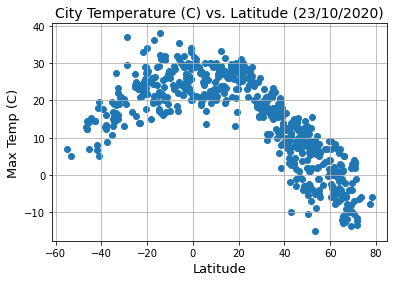

In [13]:
plt.scatter(final_table["Lat"],final_table["Max Temp"])
plt.title("City Temperature (C) vs. Latitude (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Max Temp (C)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd.png"))
plt.show()

#### Latitude vs. Humidity Plot

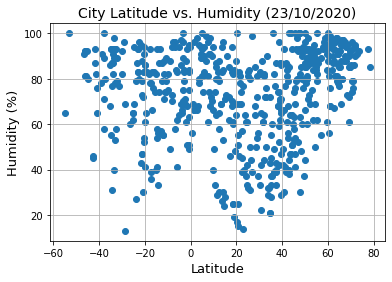

In [14]:
plt.scatter(final_table["Lat"],final_table["Humidity"])
plt.title("City Latitude vs. Humidity (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Humidity (%)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd2.png"))
plt.show()

#### Latitude vs. Cloudiness Plot

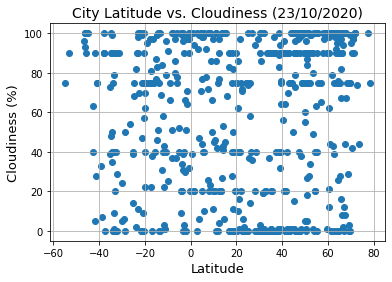

In [15]:
plt.scatter(final_table["Lat"],final_table["Cloudiness"])
plt.title("City Latitude vs. Cloudiness (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Cloudiness (%)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd3.png"))
plt.show()

#### Latitude vs. Wind Speed Plot

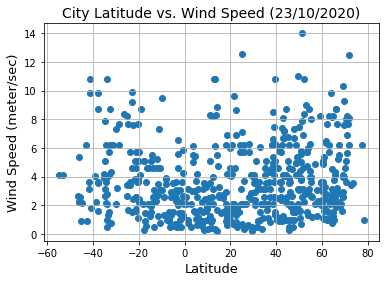

In [16]:
plt.scatter(final_table["Lat"],final_table["Wind Speed"])
plt.title("City Latitude vs. Wind Speed (23/10/2020)", fontsize=14)
plt.xlabel("Latitude", fontsize=13)
plt.ylabel("Wind Speed (meter/sec)", fontsize=13)
plt.grid()
plt.savefig(os.path.join(path,r"Fig_jd4.png"))
plt.show()

## Linear Regression

In [17]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
final_table.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,93,NZ,1603598556,92,-46.19,168.86,12.22,2.24
1,Lagoa,94,PT,1603598556,71,39.05,-27.98,17.92,7.47
2,Sinazongwe,22,ZM,1603598557,39,-17.26,27.46,24.40,0.91
3,Jamestown,90,US,1603598428,86,42.10,-79.24,4.44,2.35
4,Ushuaia,75,AR,1603598442,65,-54.80,-68.30,7.00,4.10


In [31]:
northern_hemisphere_cities=final_table.query("Lat>0")
northern_hemisphere_cities

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Lagoa,94,PT,1603598556,71,39.05,-27.98,17.92,7.47
3,Jamestown,90,US,1603598428,86,42.10,-79.24,4.44,2.35
6,Acapulco de Juárez,90,MX,1603598282,85,16.86,-99.89,27.54,2.75
7,Norman Wells,75,CA,1603598558,92,65.28,-126.83,-12.00,1.00
8,Progreso,40,MX,1603598388,83,21.28,-89.67,26.67,2.10
...,...,...,...,...,...,...,...,...,...
564,Pirganj,58,BD,1603598793,80,25.85,88.36,26.67,3.70
565,Kushiro,75,JP,1603598793,44,42.98,144.37,14.00,4.10
567,Cantaura,66,VE,1603598795,90,9.31,-64.36,23.06,3.28
568,Pacific Grove,90,US,1603598795,82,36.62,-121.92,16.00,2.10


In [32]:
southern_hemisphere_cities=final_table.query("Lat<0")
southern_hemisphere_cities

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mataura,93,NZ,1603598556,92,-46.19,168.86,12.22,2.24
2,Sinazongwe,22,ZM,1603598557,39,-17.26,27.46,24.40,0.91
4,Ushuaia,75,AR,1603598442,65,-54.80,-68.30,7.00,4.10
5,Punta Arenas,90,CL,1603598558,100,-53.15,-70.92,5.00,4.10
10,Vila Velha,90,BR,1603598375,94,-20.33,-40.29,23.33,3.60
...,...,...,...,...,...,...,...,...,...
547,Waipawa,28,NZ,1603598784,82,-41.41,175.52,18.00,10.80
556,Seddon,90,AU,1603598788,71,-37.81,144.89,13.33,9.80
557,Kerema,51,PG,1603598789,70,-7.96,145.78,28.46,3.91
559,Tuatapere,100,NZ,1603598791,92,-46.13,167.68,12.22,2.24


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression